# Taller 1

- Jose Luis Tavera Ruiz (201821999)
- Aldemar Figueroa (202021091)


#### Librerias

In [11]:
import numpy as np
import time

#### Primer Punto

Para cualquier número 𝑛 > 1 se define la siguiente operación:

1. Si el número es par, se divide entre 2.
2. Si el número es impar, se multiplica por 3 y se suma 1.
3. Si es 1 termina.

Se define la secuencia de 𝒏 como la lista de resultados de cada operación hasta llegar
a 1. Por ejemplo, la secuencia de 6 es: 6, 3, 10, 5, 16, 8, 4, 2, 1. En este punto solo se
pueden utilizar las funcionalidades básicas de Python.

a. Cree una función que reciba un entero 𝑛 y retorne una lista con la secuencia de 𝑛.

In [10]:
def sequence(n):
    #Primero creamos una lista vacia donde guardaremos los valores de la secuencia
    sequence_list = []
    # Añadimos el primer valor de la secuencia a la lista
    sequence_list.append(n)

    #Mientras n sea distinto de 1, se ejecutara el siguiente bucle
    while n!=1:

        # Si n es par, se divide entre 2
        if n%2 == 0:   
            n= int(n/2)

        # Si n es impar, se multiplica por 3 y se le suma 1
        else:
            n= int((n*3) + 1)
        
        # Se añade el valor de n a la lista
        sequence_list.append(n)

    return sequence_list

In [54]:
# Ahora haremos algunas pruebas para comprobar que la funcion sequence(n) funciona correctamente
def test_sequence():
    # Iteramos sobre los primeros 7 valores de n
    for n in range(1, 8):
        print(f"Prueba con n={n}")
        sequence_list = sequence(n)
        print(sequence_list)
        print()

test_sequence()

Prueba con n=1
[1]

Prueba con n=2
[2, 1]

Prueba con n=3
[3, 10, 5, 16, 8, 4, 2, 1]

Prueba con n=4
[4, 2, 1]

Prueba con n=5
[5, 16, 8, 4, 2, 1]

Prueba con n=6
[6, 3, 10, 5, 16, 8, 4, 2, 1]

Prueba con n=7
[7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]



b. Cree una función que reciba un entero 𝑚, retorne el valor 𝑛 tal que su secuencia
sea la más larga para los valores menores a 𝑚 y retorne el largo de la secuencia.
Utilice el punto a)

In [61]:
def longest_sequence(m):
    # Definimos n = 0 ya que toda secuencia tiene al menos un valor
    n=0
    # Definimos longest = 2 
    longest = 2
    # Hacemos un bucle que recorre todos los valores de la secuencia hasta m
    for i in range(2,m):
        # Calculamos la secuencia para cada valor de i
        sequence_i = sequence(i)
        # Calculamos la longitud de la secuencia
        length = len(sequence_i)
        # Si la longitud de la secuencia es mayor que n, actualizamos n y longest
        if length > n:
            longest = i
            n=length
    return ("Valor: " + str(longest), "Longitud: " + str(n))


In [55]:
# Ahora haremos algunas pruebas para comprobar que la funcion longest_sequence(m) funciona correctamente
def test_longest_sequence():
    # Iteramos sobre los primeros 7 valores de n
    for n in range(1, 8):
        print(f"Prueba con n={n}")
        print(longest_sequence(n))
        print()

test_longest_sequence()

Prueba con n=1
('Valor: 2', 'Longitud: 0')

Prueba con n=2
('Valor: 2', 'Longitud: 0')

Prueba con n=3
('Valor: 2', 'Longitud: 2')

Prueba con n=4
('Valor: 3', 'Longitud: 8')

Prueba con n=5
('Valor: 3', 'Longitud: 8')

Prueba con n=6
('Valor: 3', 'Longitud: 8')

Prueba con n=7
('Valor: 6', 'Longitud: 9')



c. Similar al literal anterior, cree una función que reciba un entero 𝑚 y retorne un
diccionario donde las llaves sean enteros y los valores correspondan al largo de
las secuencias de cada entero.

In [56]:
def sequence_dictionary(m):   
    #Creamos un diccionario vacio donde guardaremos los valores de la secuencia
    all_lengths = {}
    #Hace un bucle que recorre todos los valores de la secuencia hasta m
    for i in range(2,m):
        # Calculamos la secuencia para cada valor de i
        sequence_i = sequence(i)
        # Calculamos la longitud de la secuencia
        length = len(sequence_i)
        # Guardamos la longitud de la secuencia en el diccionario
        all_lengths[i] = length 
    # Devolver el diccionario con todas las longitudes
    return all_lengths

In [58]:
# Ahora haremos algunas pruebas para comprobar que la funcion sequence_dictionary(m) funciona correctamente
def test_sequence_dictionary():
    # Iteramos sobre los primeros 7 valores de m
    for m in range(2, 8):
        print(f"Testing sequence_dictionary({m})")
        result = sequence_dictionary(m)
        print(result)
        print()

test_sequence_dictionary()


Testing sequence_dictionary(2)
{}

Testing sequence_dictionary(3)
{2: 2}

Testing sequence_dictionary(4)
{2: 2, 3: 8}

Testing sequence_dictionary(5)
{2: 2, 3: 8, 4: 3}

Testing sequence_dictionary(6)
{2: 2, 3: 8, 4: 3, 5: 6}

Testing sequence_dictionary(7)
{2: 2, 3: 8, 4: 3, 5: 6, 6: 9}



d. Intenté modificar el punto a. y c. para crear una función que utiliza los resultados
calculados previamente y retorna un diccionario donde las llaves sean enteros y
los valores correspondan al largo de las secuencias de cada entero. Esto debería
permitirles crear una función mucho más rápida.

In [60]:
'''
Redefinimos la función del literal a)
'''

def sequence_2(n, all_lenghts):
     #Primero creamos una lista vacia donde guardaremos los valores de la secuencia
    sequence_list = []
    # Añadimos el primer valor de la secuencia a la lista
    sequence_list.append(n)
    # Definimos la longitud de la secuencia como 0
    length = 0
    #Mientras n sea distinto de 1, se ejecutara el siguiente bucle
    while n!=1:
        # Si n es par, se divide entre 2
        if n%2 == 0:   
            n= int(n/2)
        # Si n es impar, se multiplica por 3 y se le suma 1
        else:
            n= int((n*3) + 1)

        if n not in all_lenghts:
            # Se añade el valor de n a la lista
            sequence_list.append(n)
        else:
            # Si n ya se encuentra en el diccionario obtenemos la longitud de la secuencia
            length = all_lenghts[n]
            break
        # Se suma la longitud de la secuencia a la longitud de la secuencia actual
    length += len(sequence_list)
    # Devolvemos la longitud de la secuencia
    return length

'''
Redefinimos la función del literal c)
'''

def sequence_dictionary_2(m):
    #Creamos un diccionario vacio donde guardaremos los valores de la secuencia 
    all_lengths = {}
    #Hace un bucle que recorre todos los valores de la secuencia hasta m
    for i in range(2,m):
        # Calculamos la longitud de la secuencia en el diccionario
        length = sequence_2(i, all_lengths)
        # Guardamos la longitud de la secuencia en el diccionario
        all_lengths[i] = length
    # Devolvemos el diccionario
    return all_lengths

e. Prueben las funciones del punto c. y d. con diferentes potencias de 10. 


In [65]:
# Hacemos una funcion que mida el tiempo de ejecucion de sequence_dictionary y sequence_dictionary_2
def measure_execution_time(func, *args):
    # Se empieza a medir el tiempo
    start_time = time.time()
    # Se usa la funcion que se quiere medir
    result = func(*args)
    # Se termina de medir el tiempo
    end_time = time.time()
    # Se calcula el tiempo de ejecucion
    execution_time = end_time - start_time
    # Se devuelven los resultados
    return result, execution_time

for power in range(1, 7):
    m = 10**power
    print(f"Testing with m={m}")        
    # Medimos el tiempo de ejecucion para sequence_dictionary
    result1, execution_time1 = measure_execution_time(sequence_dictionary, m)
    # Medimos el tiempo de ejecucion para sequence_dictionary_2
    result2, execution_time2 = measure_execution_time(sequence_dictionary_2, m)
    # Imprimimos los resultados
    print("Execution time for sequence_dictionary:", execution_time1)
    print("Execution time for sequence_dictionary_2:", execution_time2)
    print()




Testing with m=10
Execution time for sequence_dictionary: 1.6689300537109375e-05
Execution time for sequence_dictionary_2: 1.621246337890625e-05

Testing with m=100
Execution time for sequence_dictionary: 0.0004730224609375
Execution time for sequence_dictionary_2: 0.00015544891357421875

Testing with m=1000
Execution time for sequence_dictionary: 0.009166479110717773
Execution time for sequence_dictionary_2: 0.0011761188507080078

Testing with m=10000
Execution time for sequence_dictionary: 0.1244969367980957
Execution time for sequence_dictionary_2: 0.012537479400634766

Testing with m=100000
Execution time for sequence_dictionary: 1.6425628662109375
Execution time for sequence_dictionary_2: 0.17527341842651367

Testing with m=1000000
Execution time for sequence_dictionary: 21.968555688858032
Execution time for sequence_dictionary_2: 1.63602876663208



#### Segundo Punto

En este punto solo se pueden utilizar las operaciones básicas de numpy. Los vectores
son arrays en numpy. Pueden asumir que los vectores 𝑌 solo toman dos valores.

a. Cree una función euclidean_distance que calcule la distancia euclidiana en $\mathbb{R}^n$ entre dos vectores $x$, $z$.

Según Stanford (1999), para calcular la distancia euclidiana en  $\mathbb{R}^n$, simplemente restamos los vectores componente a componente y elevamos al cuadrado. La raíz cuadrada de la suma de los cuadrados corresponde a la métrica euclidiana. Puedes obtener más información en el enlace [Stanford (1999)](https://hlab.stanford.edu/brian/euclidean_distance_in.html).


$$
\text{distancia} = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$

In [35]:
def euclidean_distance(x, z):
# Chequeamos si los vectores son del mismo tamaño
    if len(x) != len(z):
# En caso contrario, levantamos un error
        raise ValueError("The vectors must be the same size")
    else:
        return np.sqrt(np.sum((x - z)**2))

In [36]:
# Probamos la función con algunos ejemplos
x = np.array([1, 2, 3])
z = np.array([4, 5, 6])
print(x)
print(z)
print("Euclidean Distance: " + str(round(euclidean_distance(x, z), 4)))
print("")

x = np.array([1, 2, 3, 4, 5])
z = np.array([6, 7, 8, 9, 10])
print(x)
print(z)
print("Euclidean Distance: " + str(round(euclidean_distance(x, z), 4)))

[1 2 3]
[4 5 6]
Euclidean Distance: 5.1962

[1 2 3 4 5]
[ 6  7  8  9 10]
Euclidean Distance: 11.1803


b. Cree una función nearest_neighbor que, dado un vector 𝑥 y una matriz 𝑋_𝑡𝑟𝑎𝑖𝑛, retorna el vector de los datos de entrenamiento 𝑋_𝑡𝑟𝑎𝑖𝑛 que minimiza la distancia euclidiana a 𝑥. Debe utilizar la función euclidean_distance

In [37]:
def nearest_neighbor(x, X_train):
    # Definimos la distancia mínima como infinito
    min_distance = float('inf')
    # Definimos el vector más cercano como None
    nearest_vector = None
    
    # Iteramos sobre cada vector en el conjunto de entrenamiento
    for vector in X_train:
        # Calculamos la distancia entre el vector actual y el vector x
        distance = euclidean_distance(x, vector)
        # Si la distancia es menor que la distancia mínima actual
        if distance < min_distance:
            # Actualizamos la distancia mínima y el vector más cercano
            min_distance = distance
            nearest_vector = vector
    
    return nearest_vector

c. Cree una función k_nearest_neighbors que, dado un vector 𝑥, una
matriz 𝑋_𝑡𝑟𝑎𝑖𝑛 y un entero 𝑘, retorna los k vectores más cercanos de los datos
de entrenamiento 𝑋. Debe usar alguna de las funciones creadas previamente

In [38]:
def k_nearest_neighbors(x, X_train, k):
    # Creamos un diccionario para guardar las distancias y los vectores
    distances_dict = {}
    # Creamos una lista para guardar todas las distancias
    all_distances = []
    # Iteramos sobre cada vector en el conjunto de entrenamiento
    for vector in X_train:
        # Calculamos la distancia entre el vector actual y el vector x
        distance = euclidean_distance(x, vector)
        # Guardamos la distancia en la lista
        all_distances.append(distance)
        # Guarda la distancia y el vector en el diccionario
        distances_dict[distance] = vector
    
    # Sorteamos todas las distancias
    all_distances.sort()
    # Guardamos los k vectores más cercanos
    k_nearest = [distances_dict[distance] for distance in all_distances[:k]]
    
    return k_nearest

In [39]:
# Ejemplo de uso:
x = np.array([1, 2, 3])
X_train = np.array([[4, 5, 6], [7, 8, 9], [10, 11, 12], [0, 0, 0]])
k = 2

nearest = k_nearest_neighbors(x, X_train, k)
print(f"Los {k} vectores más cercanos en X_train a x son:", nearest)

Los 2 vectores más cercanos en X_train a x son: [array([0, 0, 0]), array([4, 5, 6])]


d. Cree una función predict_class que, dado vector 𝑥, una matriz 𝑋_𝑡𝑟𝑎𝑖𝑛, un
vector 𝑌_𝑡𝑟𝑎𝑖𝑛, y un entero 𝑘, haga la predicción de cuál debe ser su clase
(binaria) según el algoritmo de kNN. Debe utilizar la función
k_nearest_neighbors.

#### Punto Cuatro

Descargar el archivo classification_datasaet.csv.

In [78]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [67]:
# Abrimos el archivo csv
df = pd.read_csv('classification_dataset.csv')

In [69]:
# Display the first few rows of the dataframe
print(df.head())


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.479989   1.076387   0.274466   0.057739   1.656022  -1.049337   
1  -0.239811  -0.108878  -0.386170  -0.905932   0.370415   0.599711   
2  -0.641161   0.796919   0.525696   0.127154  -2.985255  -0.881128   
3   0.248545  -0.154218   0.733516   0.703259   0.470113  -1.067296   
4  -0.475043  -2.602638  -1.333294   0.260551  -1.527103   0.391718   

   feature_6  feature_7  feature_8  feature_9  target  
0   0.150677   0.751501  -0.076891   1.016506       1  
1   2.209090  -1.049893  -0.433789   2.505085       1  
2  -0.928485   0.384747   0.814817   0.066508       1  
3  -1.474869   0.409360   0.426057  -1.748092       0  
4   3.191274  -2.861860  -1.063157   1.275427       0  


In [71]:
# Check the shape of the dataframe
print("Shape del dataframe:", df.shape)


Shape del dataframe: (1000, 11)


In [72]:
# Check the data types of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
feature_0    float64
feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
feature_5    float64
feature_6    float64
feature_7    float64
feature_8    float64
feature_9    float64
target         int64
dtype: object


In [73]:
# Chequeamos si hay valores faltantes
print("Missing values por Columna:")
print(df.isnull().sum())


Missing values in each column:
feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
feature_8    0
feature_9    0
target       0
dtype: int64


In [74]:
# Check basic statistics of the numerical columns
print("Basic statistics of the numerical columns:")
print(df.describe())


Basic statistics of the numerical columns:
         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.004543    -0.032966     0.057683     0.007632     0.012276   
std       1.002503     1.145290     0.955562     1.009872     0.980226   
min      -4.032602    -5.051559    -3.437063    -4.267186    -3.253993   
25%      -0.652377    -0.724177    -0.569093    -0.668221    -0.633988   
50%       0.044962    -0.102816     0.045899     0.045645     0.016508   
75%       0.646045     0.553662     0.703013     0.668420     0.686445   
max       3.249901     4.594686     2.710780     2.799294     3.027182   

         feature_5    feature_6    feature_7    feature_8    feature_9  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.021229     0.171337    -0.127766    -0.003169     0.198735   
std       0.998634     1.540330     1.056942     1.071977     1.0008

In [76]:
# Chequea la distribución de la variable target
print("Distribución de la variable target:")
print(df['target'].value_counts())



Distribución de la variable target:
target
0    702
1    298
Name: count, dtype: int64


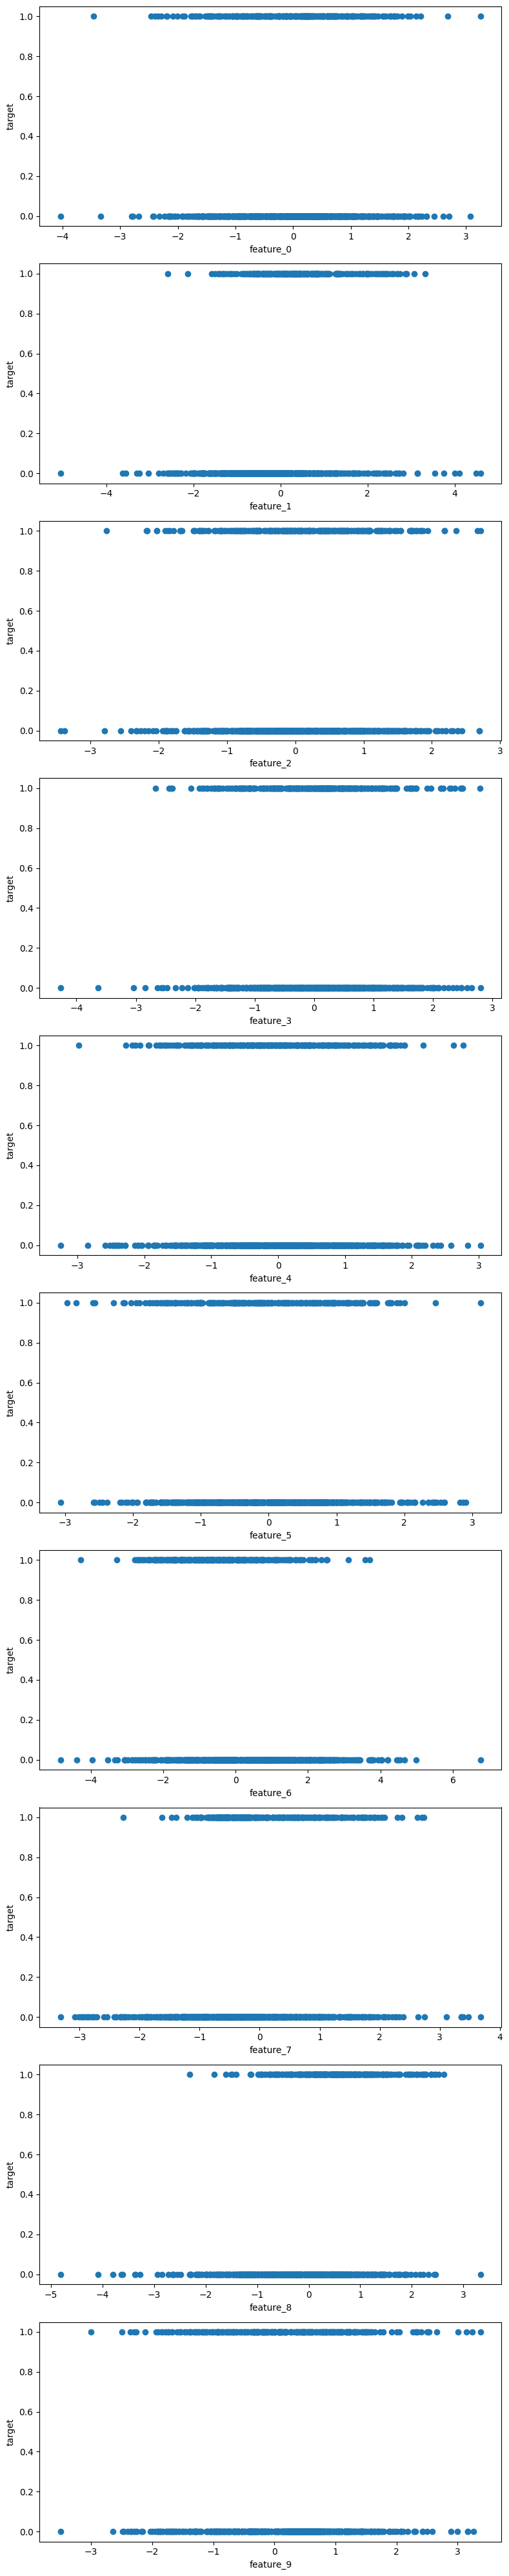

In [82]:
import seaborn as sns
# Get the list of features
features = df.columns[:-1]

# Create subplots
fig, axes = plt.subplots(len(features), 1, figsize=(8, len(features)*4))

# Iterate over each feature and plot against the target
for i, feature in enumerate(features):
    ax = axes[i]
    sns.scatterplot(data=df, x=feature, y='target', ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('target')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()



a. Entrenar un modelo que optimice la predicción de ambas clases.
